# **ANALISIS SENTIMEN TERHADAP FILM KKN DI DESA PENARI**

**Business Understanding**: KKN di Desa Penari merupakan film horor yang menceritakan berbagai kejadian mistis yang dialami enam mahasiswa ketika menjalani KKN di sebuah desa terpencil. Film ini menyedot antusias masyarakat Indonesia dengan meraih 2 juta penonton hanya dalam kurun waktu 6 hari penayangan. Berbagai opini diberikan setelah menonton film tersebut, baik positif, netral, maupun negatif. Opini yang diberikan dapat memberikan insight dan menjadi salah satu pertimbangan dalam kebijakan penayangan dan produksi untuk sekuel berikutnya.

**Notable Skills**: Business Accumen, Crawling Data, Data Analysis, NLTK, Python

**Purpose**: menganalisis bagaimana opini terhadap film "KKN di Desa Penari" pada masa awal penayangan di bioskop

**Business Benefit**: Mengetahui tanggapan masyarakat Indonesia terhadap film "KKN di Desa Penari", sehingga dapat digunakan sebagai salah satu bahan pertimbangan televisi Indonesia dalam menayangkan film tersebut ke layar televisi.

In [ ]:
#Clone Tweet Harvest

!pip install pandas
!curl -sL https://deb.nodesource.com/setup_18.x | sudo -E bash -
!sudo apt-get install -y nodejs

In [ ]:
pip install googletrans==4.0.0-rc1

In [ ]:
#Import Modul & Library yang dibutuhkan

import re
from textblob import TextBlob
import datetime as DT
import yfinance as yf
import matplotlib.pyplot as plt
import numpy
from googletrans import Translator

In [ ]:
# Crawl Data 15 hari penayangan awal

filename = 'KKN_Di_Desa_Penari.csv'
search_keyword = 'KKN di Desa Penari until:2022-05-15 since:2022-04-30'
limit = 700

!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} --token ""

In [ ]:
import pandas as pd

# Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=";")

# Display the DataFrame
display(df)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sat May 14 22:18:26 +0000 2022,1525601456631361536,"Biodata dan Agama Aghniny Haque, Pemeran Ayu d...",0,0,0,2,in,231355136,1525601456631361536,SINDOnews,https://twitter.com/SINDOnews/status/152560145...
1,Sat May 14 22:18:26 +0000 2022,1525601456619155456,"Biodata dan Agama Aulia Sarah, Pemeran Badaraw...",0,0,0,1,in,231355136,1525601456619155456,SINDOnews,https://twitter.com/SINDOnews/status/152560145...
2,Sat May 14 22:14:28 +0000 2022,1525600459968303104,btw gimana ye ntn kkn di desa penari kalo gua ...,0,0,0,0,in,241524844,1525600459968303104,Dewoadpty,https://twitter.com/Dewoadpty/status/152560045...
3,Sat May 14 22:04:37 +0000 2022,1525597979553701888,"Film Kuntilanak 3 Tembus 1 Juta Penonton, Keja...",0,0,0,0,in,231355136,1525597979553701888,SINDOnews,https://twitter.com/SINDOnews/status/152559797...
4,Sat May 14 21:50:26 +0000 2022,1525594412684054529,Di kasih cobaan sama Tuhan itu biar kita perca...,0,0,0,1,in,917035368,1525594412684054529,ceoSbux,https://twitter.com/ceoSbux/status/15255944126...
...,...,...,...,...,...,...,...,...,...,...,...,...
700,Sat May 14 01:40:10 +0000 2022,1525289836198117376,KKN di Desa Penari &lt KKN di Desa Leuwigoong,0,0,0,0,in,637025428,1525289836198117376,WahidDimyati,https://twitter.com/WahidDimyati/status/152528...
701,Sat May 14 01:38:43 +0000 2022,1525289473596362753,Marketing utk cerita KKN Di Desa Penari mmg ma...,0,1,0,1,in,130372081,1525289473596362753,ElleJezebel,https://twitter.com/ElleJezebel/status/1525289...
702,Sat May 14 01:36:57 +0000 2022,1525289027598835712,"Tak Kalah dengan KKN di Desa Penari, Cerita Mi...",0,0,0,0,in,1307144779,1525289027598835712,JurnalNews_ID,https://twitter.com/JurnalNews_ID/status/15252...
703,Sat May 14 01:35:36 +0000 2022,1525288688233549825,Jadiii kemarin aku nonton film kkn desa penari...,0,9,0,7,in,1016150694598852608,1525288688233549825,softboyinside,https://twitter.com/softboyinside/status/15252...


In [ ]:
pip install mtranslate

In [ ]:
from mtranslate import translate
from googletrans.models import Translated

def clean_tweet(tweet):
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    return tweet_bersih

hasilAnalisis = []

for index, tweet in df.iterrows():
    tweet_properties = {}
    tweet_properties["tanggal_tweet"] = tweet["created_at"]
    tweet_properties["pengguna"] = tweet["username"]
    tweet_properties["isi_tweet"] = tweet["full_text"]
    isi_tweet_bersih = clean_tweet(str(tweet["full_text"]))

    try:
        translated_text = translate(isi_tweet_bersih, "en")
    except Exception as e:
        print(f"Error translating tweet: {e}")
        translated_text = ""

    analysis = TextBlob(translated_text)

    if analysis.sentiment.polarity > 0.0:
        tweet_properties["sentimen"] = "positif"
    elif analysis.sentiment.polarity == 0.0:
        tweet_properties["sentimen"] = "netral"
    else:
        tweet_properties["sentimen"] = "negatif"

    # Membatasi jumlah retweet
    if tweet["retweet_count"] > 0:
        if tweet_properties not in hasilAnalisis:
            hasilAnalisis.append(tweet_properties)
    else:
        hasilAnalisis.append(tweet_properties)

In [ ]:
hasilAnalisis

[{'tanggal_tweet': 'Sat May 14 23:49:52 +0000 2022',
  'pengguna': 'ninaroselan',
  'isi_tweet': 'Kkn di desa penari. ⭐️⭐️⭐️⭐️⭐️',
  'sentimen': 'netral'},
 {'tanggal_tweet': 'Sat May 14 23:47:03 +0000 2022',
  'pengguna': 'antaranews',
  'isi_tweet': 'Emil Dardak akui beberapa kali terkejut saksikan KKN Di Desa Penari" https://t.co/5A2tQ2PAb0"',
  'sentimen': 'positif'},
 {'tanggal_tweet': 'Sat May 14 23:42:07 +0000 2022',
  'pengguna': 'ansnyrtrrswh97',
  'isi_tweet': 'Pengin nonton KKN di Desa Penari. Tapi ga berani kalo sendirian wkkk',
  'sentimen': 'netral'},
 {'tanggal_tweet': 'Sat May 14 23:19:36 +0000 2022',
  'pengguna': 'semarakredaksi',
  'isi_tweet': 'Film KKN di Desa Penari Sudah Ditonton Lebih 2 Juta Orang Kalahkan Doctor Strange2: In Multivers of Madness https://t.co/kWBZ67LsJc',
  'sentimen': 'positif'},
 {'tanggal_tweet': 'Sat May 14 23:15:17 +0000 2022',
  'pengguna': 'infopenanews',
  'isi_tweet': 'Cerita Asli KKN di Desa Penari versi Nur dan Widya dari Thread Twitt

In [ ]:
tweet_positif = [t for t in hasilAnalisis if t["sentimen"]=="positif"]
tweet_netral = [t for t in hasilAnalisis if t["sentimen"]=="netral"]
tweet_negatif = [t for t in hasilAnalisis if t["sentimen"]=="negatif"]

In [ ]:
print("Hasil Sentimen")
print("positif: ", len(tweet_positif), "({} %)".format(100*len(tweet_positif)/len(hasilAnalisis)))
print("netral: ", len(tweet_netral), "({} %)".format(100*len(tweet_netral)/len(hasilAnalisis)))
print("positif: ", len(tweet_negatif), "({} %)".format(100*len(tweet_negatif)/len(hasilAnalisis)))

Hasil Sentimen
positif:  281 (39.74540311173975 %)
netral:  300 (42.432814710042436 %)
positif:  126 (17.821782178217823 %)


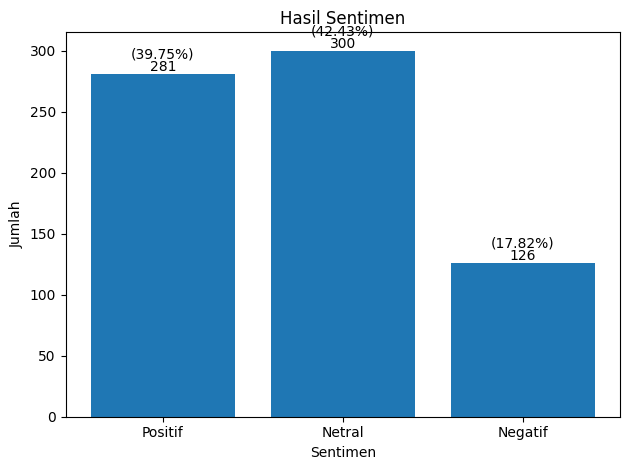

In [ ]:
#Visualisasi Hasil Sentimen

import matplotlib.pyplot as plt

# Menghitung jumlah tweet dengan sentimen positif, netral, dan negatif
jumlah_positif = len(tweet_positif)
jumlah_netral = len(tweet_netral)
jumlah_negatif = len(tweet_negatif)

# Menghitung persentase tweet dengan sentimen positif, netral, dan negatif
persentase_positif = 100 * jumlah_positif / len(hasilAnalisis)
persentase_netral = 100 * jumlah_netral / len(hasilAnalisis)
persentase_negatif = 100 * jumlah_negatif / len(hasilAnalisis)

# Membuat label untuk sumbu x
labels = ['Positif', 'Netral', 'Negatif']

# Membuat nilai untuk sumbu y
values = [jumlah_positif, jumlah_netral, jumlah_negatif]

# Membuat bar chart
plt.bar(labels, values)

# Menambahkan label pada bar chart
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Menampilkan persentase di atas setiap bar
plt.text(0, jumlah_positif + 10, f"({persentase_positif:.2f}%)", ha='center', va='bottom')
plt.text(1, jumlah_netral + 10, f"({persentase_netral:.2f}%)", ha='center', va='bottom')
plt.text(2, jumlah_negatif + 10, f"({persentase_negatif:.2f}%)", ha='center', va='bottom')

# Menambahkan judul dan label pada sumbu x dan y
plt.title("Hasil Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")

# Menampilkan plot
plt.tight_layout()
plt.show()

Sentimen netral terbanyak. Sentimen positif lebih banyak daripada sentimen negatif yang berarti banyak respon positif dari penonton setelah menonton film KKN di Desa Penari

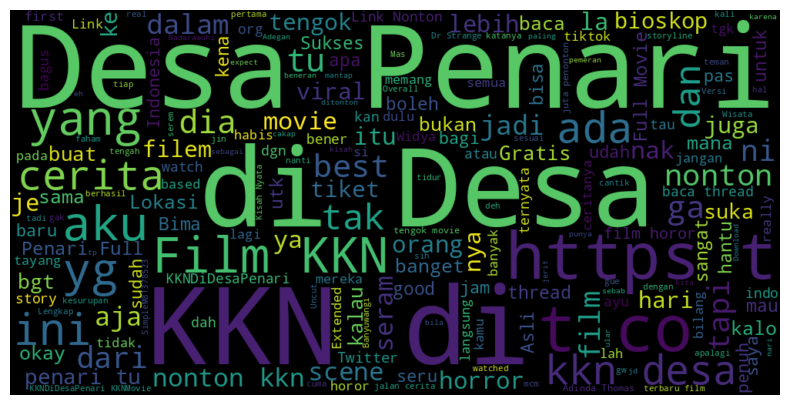

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan teks tweet positif menjadi satu string
tweet_positif = [tweet["isi_tweet"] for tweet in hasilAnalisis if tweet["sentimen"] == "positif"]
tweet_positif_string = ' '.join(tweet_positif)

# Membuat WordCloud untuk sentimen positif
wordcloud = WordCloud(width=1000, height=500, max_font_size=150, random_state=42).generate(tweet_positif_string)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

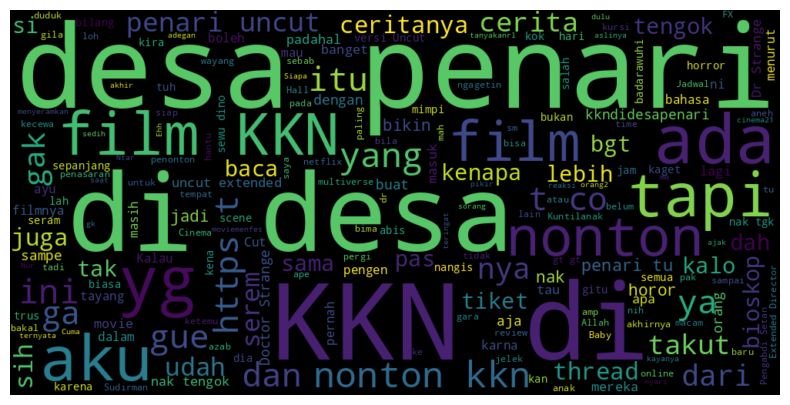

In [ ]:
# Menggabungkan teks tweet positif menjadi satu string
tweet_negatif = [tweet["isi_tweet"] for tweet in hasilAnalisis if tweet["sentimen"] == "negatif"]
tweet_negatif_string = ' '.join(tweet_negatif)

# Membuat WordCloud untuk sentimen negatif
wordcloud = WordCloud(width=1000, height=500, max_font_size=150, random_state=42).generate(tweet_negatif_string)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

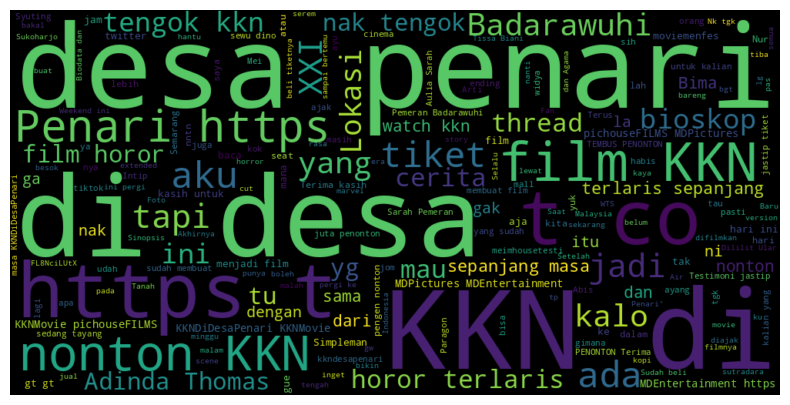

In [ ]:
# Menggabungkan teks tweet positif menjadi satu string
tweet_netral = [tweet["isi_tweet"] for tweet in hasilAnalisis if tweet["sentimen"] == "netral"]
tweet_netral_string = ' '.join(tweet_netral)

# Membuat WordCloud untuk sentimen netral
wordcloud = WordCloud(width=1000, height=500, max_font_size=150, random_state=42).generate(tweet_netral_string)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()